In [94]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy import optimize
from scipy.optimize import curve_fit

import os
from functools import reduce
import scipy
from scipy.stats.stats import pearsonr
from scipy import stats
from scipy.stats import ks_2samp
from scipy.stats import entropy
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import nbinom
from scipy.stats import expon
from scipy.stats.mstats import gmean

from scipy import optimize
from scipy.optimize import curve_fit

import statsmodels.api as sm
lowess = sm.nonparametric.lowess
import math

import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

https://science.sciencemag.org/content/358/6360/194.long

In [3]:
dg = pd.read_csv("https://github.com/ucbmcb288/data/blob/master/dge_normalized.txt?raw=true", sep="\t")

In [4]:
dg

,GTACTAATTACN_2,AGGCTAATGGAC_3,TAGACAAAAGCT_4,TCTACTAGTGTN_5,CCGTGCTGAACA_3,GAGAAAATGAAG_7,GCCTAGTGACGT_4,CAGTATCGAGAN_2,AGATTACCCTTC_6,AACCCCACGCTC_2,...,TAGAGGACCGTA_3,TTGGGTAACAGC_3,GTGAGCTTATGG_3,GCTTCTCCGTCT_3,GCTTGGAAATCC_7,GCGATCAGTCTT_3,AGAACGATATAC_8,CCGATTCGCTTN_4,CCTCTCAGTCTC_5,GACTCTCTCGCA_4
128up,2.5699,2.5087,0.0000,0.0000,0.0000,0.0000,0.0000,2.5561,2.5071,2.3432,...,0.0000,0.0000,3.5265,0.0000,0.0000,0.0000,0.0000,1.9716,0.0000,0.0000
140up,1.1599,3.0066,0.0000,0.0000,0.0000,3.2493,3.2082,3.9674,0.0000,0.0000,...,3.4705,0.0000,3.5265,3.1248,2.8336,3.2716,3.4109,2.7748,0.0000,0.0000
14-3-3epsilon,8.8384,8.7878,8.8431,8.8687,8.3452,8.9987,8.7877,8.8601,8.6240,8.7304,...,8.3828,8.1859,9.0986,8.5528,8.8086,8.8982,8.0289,8.3328,8.5545,7.7798
14-3-3zeta,5.9422,5.4336,6.0169,5.0161,6.0097,5.8153,5.6568,5.3236,6.6349,6.0485,...,4.4039,5.4592,6.9919,5.8807,6.3340,6.5884,5.6201,5.1725,4.6401,5.3180
18w,3.4430,3.0066,2.3175,4.0600,3.5326,2.3936,3.2082,2.5561,0.0000,0.0000,...,3.4705,0.0000,0.0000,0.0000,3.7287,0.0000,0.0000,0.0000,5.6108,3.4226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zw10,2.8424,3.0066,2.3175,2.2986,0.0000,3.2493,2.3564,2.5561,2.5071,0.0000,...,0.0000,0.0000,0.0000,3.6535,0.0000,0.0000,0.0000,4.2119,3.1664,0.0000
Zwilch,0.0000,1.7423,2.3175,3.1440,0.0000,0.0000,0.0000,0.0000,0.0000,3.7249,...,4.4039,0.0000,0.0000,3.1248,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
zyd,1.1599,1.7423,0.0000,2.2986,3.0086,0.0000,2.3564,2.5561,0.0000,0.0000,...,0.0000,4.4916,0.0000,2.2813,0.0000,0.0000,3.4109,0.0000,0.0000,0.0000
zye,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [19]:
insitu_bin = pd.read_csv("insitu_matrix.txt",sep=' ')

In [20]:
insitu_bin

,aay,Ama,Ance,Antp,apt,Blimp-1,bmm,bowl,brk,Btk29A,...,tkv,tll,toc,Traf4,trn,tsh,twi,zen,zen2,zfh1
0,0,1,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,1,1,1,1,1,1,...,0,0,0,1,1,0,1,0,0,0
2,0,0,0,0,1,1,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,1,1,1,1,1,1,...,0,0,0,1,1,0,1,0,0,0
4,0,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3035,1,0,0,0,1,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,0
3036,0,1,0,0,0,1,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
3037,1,1,0,1,0,0,0,0,0,0,...,1,0,0,1,1,1,1,0,0,0


In [21]:
gdf = pd.read_csv("geometry.txt",sep=" ")

In [22]:
gdf

,x,y,z
0,-194.042242,0.221890,30.195476
1,-203.322900,1.928557,20.081308
2,-200.250107,3.588368,23.932470
3,-205.875337,3.577224,14.820966
4,-193.173936,9.531855,29.667388
...,...,...,...
3034,-16.754806,63.306474,27.299752
3035,166.074792,5.717830,44.866596
3036,-118.396337,33.403262,-48.864773
3037,-20.054276,3.220607,-78.112121


In [23]:
gdf.columns = ['x_pos','y_pos','z_pos']

In [24]:
insitu = pd.concat([insitu_bin,gdf],axis=1)

In [25]:
insitu

,aay,Ama,Ance,Antp,apt,Blimp-1,bmm,bowl,brk,Btk29A,...,Traf4,trn,tsh,twi,zen,zen2,zfh1,x_pos,y_pos,z_pos
0,0,1,0,0,1,1,1,1,1,1,...,0,0,0,1,0,0,0,-194.042242,0.221890,30.195476
1,0,1,0,0,1,1,1,1,1,1,...,1,1,0,1,0,0,0,-203.322900,1.928557,20.081308
2,0,0,0,0,1,1,1,1,0,1,...,0,0,0,1,0,0,0,-200.250107,3.588368,23.932470
3,0,1,0,0,1,1,1,1,1,1,...,1,1,0,1,0,0,0,-205.875337,3.577224,14.820966
4,0,0,0,0,1,1,1,1,1,1,...,0,0,0,1,0,0,0,-193.173936,9.531855,29.667388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,-16.754806,63.306474,27.299752
3035,1,0,0,0,1,0,0,1,1,1,...,1,0,0,0,0,0,0,166.074792,5.717830,44.866596
3036,0,1,0,0,0,1,1,0,1,0,...,0,1,0,1,0,0,0,-118.396337,33.403262,-48.864773
3037,1,1,0,1,0,0,0,0,0,0,...,1,1,1,1,0,0,0,-20.054276,3.220607,-78.112121


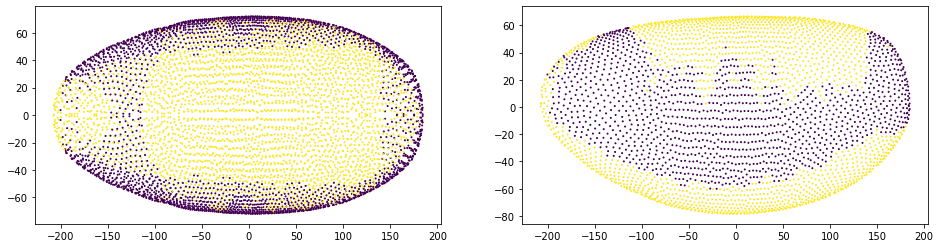

In [28]:
g = 'Ama'

fig,ax = plt.subplots(1,2,figsize=(16,4))
ax[0].scatter(insitu.x_pos,insitu.y_pos,s=1,c=insitu[g])
ax[0].scatter(insitu.x_pos,-insitu.y_pos,s=1,c=insitu[g])
ax[1].scatter(insitu.x_pos,insitu.z_pos,s=1,c=insitu[g])

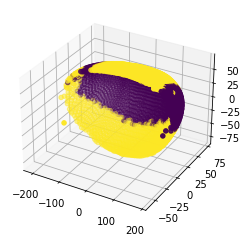

In [30]:
ax = plt.axes(projection='3d')
ax.scatter3D(insitu.x_pos,insitu.y_pos,insitu.z_pos,c=insitu[g])

In [31]:
bdt = pd.read_csv("bdtnp.txt",sep="\t")

In [32]:
bdt

,aay,Ama,Ance,Antp,apt,Blimp-1,bmm,bowl,brk,Btk29A,...,tkv,tll,toc,Traf4,trn,tsh,twi,zen,zen2,zfh1
0,0.116516,0.224190,0.033730,0.104307,0.673878,0.856570,0.469676,0.286151,0.320923,0.737946,...,0.353227,0.102896,0.153453,0.129360,0.087361,0.147089,0.225082,0.027564,0.297847,0.372422
1,0.113320,0.208761,0.044785,0.103447,0.743820,0.462554,0.570401,0.345240,0.320727,0.913163,...,0.268072,0.093506,0.206405,0.313327,0.230506,0.190749,0.440296,0.024157,0.455723,0.389489
2,0.092872,0.172598,0.036166,0.096985,0.838291,0.467538,0.478229,0.377768,0.297598,0.931254,...,0.315466,0.090488,0.196441,0.161869,0.102645,0.177968,0.347098,0.019817,0.598716,0.502384
3,0.101251,0.207963,0.066009,0.092872,0.597823,0.497481,0.479122,0.580058,0.334111,0.746340,...,0.211007,0.110080,0.205833,0.287976,0.382287,0.189138,0.542763,0.019013,0.570066,0.397117
4,0.127009,0.176440,0.084271,0.027938,0.621983,0.833522,0.680243,0.201147,0.359235,0.755608,...,0.447295,0.079012,0.152232,0.105062,0.109857,0.166762,0.259750,0.025874,0.349462,0.498263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,0.108630,0.123423,0.072152,0.460941,0.274066,0.591140,0.215415,0.226733,0.139501,0.657080,...,0.151405,0.043510,0.030431,0.119654,0.121339,0.911462,0.103898,0.142042,0.426652,0.537250
3035,1.489714,0.144034,0.049330,0.081190,0.821476,0.312973,0.108817,0.236404,0.679630,0.482218,...,0.630117,0.349061,0.041103,0.432099,0.123119,0.111749,0.089729,0.043411,0.606762,0.629268
3036,0.095975,0.648871,0.014741,0.184826,0.357911,0.406147,0.400752,0.308844,0.437903,0.133464,...,0.466361,0.085663,0.055872,0.270265,0.359610,0.156088,0.444891,0.017977,0.125641,0.380294
3037,0.220409,0.751017,0.048882,0.331598,0.189880,0.278077,0.177882,0.182164,0.107902,0.188577,...,0.578350,0.065762,0.041828,0.503958,0.187839,0.852346,0.937886,0.039697,0.340491,0.286497


In [33]:
bdt = pd.concat([bdt,gdf], axis=1)

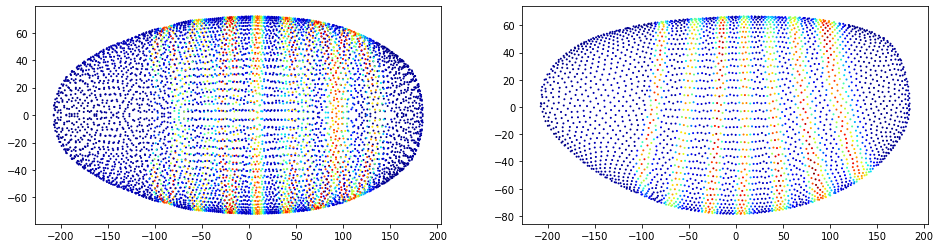

In [34]:
g = 'eve'

fig,ax = plt.subplots(1,2,figsize=(16,4))
ax[0].scatter(bdt.x_pos,bdt.y_pos,s=1,c=bdt[g],cmap='jet')
ax[0].scatter(bdt.x_pos,-bdt.y_pos,s=1,c=bdt[g],cmap='jet')
ax[1].scatter(bdt.x_pos,bdt.z_pos,s=1,c=bdt[g],cmap='jet')


In [48]:
X = (dg.values).T

In [36]:
X.shape

(1297, 8924)

In [37]:
pca = PCA(n_components = 10)

In [38]:
pca.fit(X)

PCA(n_components=10)

In [39]:
X_pca = pca.transform(X)

In [40]:
X_pca.shape

(1297, 10)

In [41]:
dgpca = pd.DataFrame(data = X_pca)
dgpca['cellID'] = dg.columns
dgpca = dgpca.set_index("cellID")

In [42]:
dgpca

,0,1,2,3,4,5,6,7,8,9
cellID,,,,,,,,,,
GTACTAATTACN_2,-50.578494,-0.722674,4.591520,-8.866967,14.555237,2.268603,-8.010460,-1.828373,3.725883,-7.111236
AGGCTAATGGAC_3,-35.965545,8.530567,-10.002883,-15.239821,5.314780,0.439378,-8.757854,-6.726402,2.628523,-4.160734
TAGACAAAAGCT_4,-31.321712,-8.812651,12.396941,-3.294197,-1.840499,2.037738,-5.568874,-1.306077,6.797345,3.059378
TCTACTAGTGTN_5,-27.194550,6.970546,0.009365,0.720184,28.235042,2.906567,3.638824,0.035976,-10.634264,2.810779
CCGTGCTGAACA_3,-22.801996,-9.786832,-6.722042,-12.423781,-6.067910,11.050138,-5.809375,5.270704,2.642292,1.788464
...,...,...,...,...,...,...,...,...,...,...
GCGATCAGTCTT_3,-8.167339,7.257409,-10.400976,-16.020525,-7.305773,0.408340,5.936670,-1.080939,7.915182,19.355629
AGAACGATATAC_8,44.580706,-17.283488,-14.550695,7.446913,-0.854604,-8.626555,1.426072,1.072395,9.777120,-14.228031
CCGATTCGCTTN_4,-12.608893,-32.890724,-10.119261,4.027979,-9.760131,-0.886871,3.268797,1.604834,5.208539,-7.180566


Text(0, 0.5, 'PCA 2')

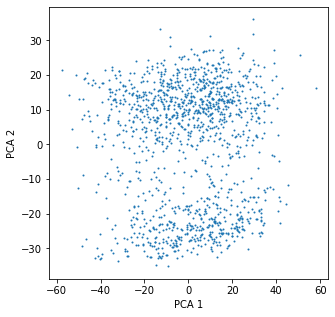

In [43]:
i = 0
j = 1

fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(dgpca[i],dgpca[j],s=1)
ax.set_xlabel("PCA %d" %(i+1))
ax.set_ylabel("PCA %d" %(j+1))

Text(0, 0.5, 'PCA 10')

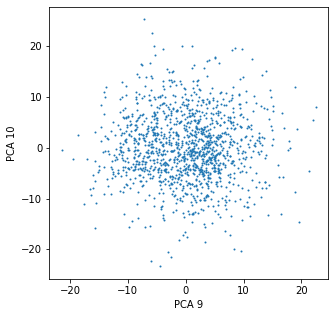

In [46]:
i = 8
j = 9

fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(dgpca[i],dgpca[j],s=1)
ax.set_xlabel("PCA %d" %(i+1))
ax.set_ylabel("PCA %d" %(j+1))

In [54]:
tsne = TSNE(n_components=2,random_state =123812398)
X_tsne = tsne.fit_transform(X)

(-10.0, 10.0)

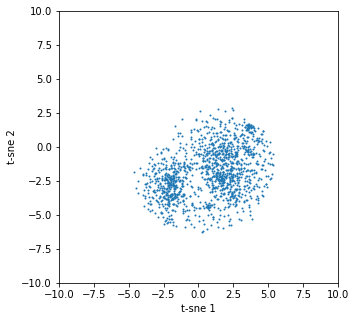

In [55]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.set_xlabel("t-sne 1")
ax.set_ylabel("t-sne 2")
ax.scatter(X_tsne[:,0],X_tsne[:,1],s=1)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)

In [57]:
gmm = GaussianMixture(n_components=15)
gmmX = gmm.fit(X_tsne)
gmmXp = gmmX.predict(X_tsne)

(-10.0, 10.0)

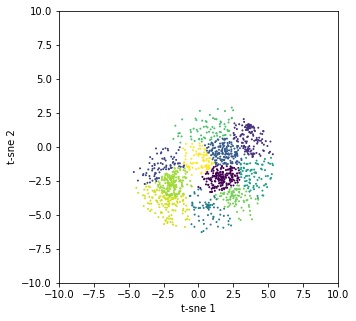

In [58]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.set_xlabel("t-sne 1")
ax.set_ylabel("t-sne 2")
ax.scatter(X_tsne[:,0],X_tsne[:,1],c=gmmXp,s=1)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)

In [61]:
gmm = GaussianMixture(n_components=5)
gmmX = gmm.fit(X_pca)
gmmXp = gmmX.predict(X_pca)

(-10.0, 10.0)

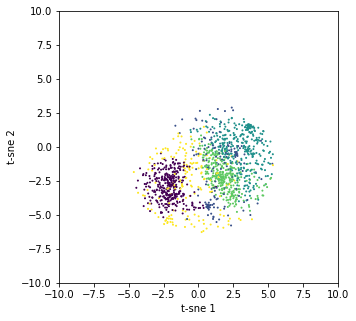

In [62]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.set_xlabel("t-sne 1")
ax.set_ylabel("t-sne 2")
ax.scatter(X_tsne[:,0],X_tsne[:,1],c=gmmXp,s=1)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)

In [102]:
tsne = TSNE(n_components=2, early_exaggeration = 20, method='exact', random_state = 2056814238, init='random',learning_rate = 'auto')

X_pca_tsne = tsne.fit_transform(X_pca)

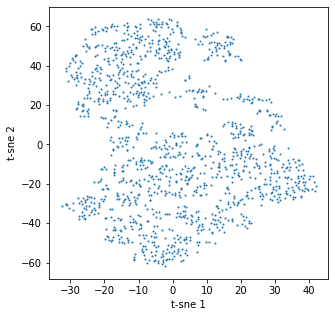

In [103]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.set_xlabel("t-sne 1")
ax.set_ylabel("t-sne 2")
ax.scatter(X_pca_tsne[:,0],X_pca_tsne[:,1],s=1)

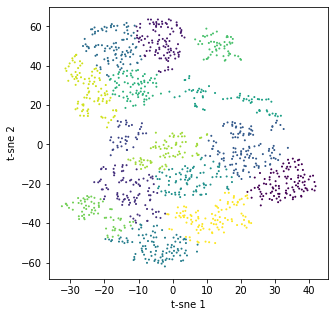

In [105]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.set_xlabel("t-sne 1")
ax.set_ylabel("t-sne 2")
ax.scatter(X_pca_tsne[:,0],X_pca_tsne[:,1],s=1, c=gmmXp)

In [27]:
insitu.columns

Index(['aay', 'Ama', 'Ance', 'Antp', 'apt', 'Blimp-1', 'bmm', 'bowl', 'brk',
       'Btk29A', 'bun', 'cad', 'CenG1A', 'CG10479', 'CG11208', 'CG14427',
       'CG17724', 'CG17786', 'CG43394', 'CG8147', 'cnc', 'croc', 'Cyp310a1',
       'D', 'dan', 'danr', 'Dfd', 'disco', 'Doc2', 'Doc3', 'dpn', 'edl', 'ems',
       'erm', 'Esp', 'E(spl)m5-HLH', 'eve', 'exex', 'fj', 'fkh', 'ftz', 'gk',
       'gt', 'h', 'hb', 'hkb', 'htl', 'Ilp4', 'ImpE2', 'ImpL2', 'ken', 'kni',
       'knrl', 'Kr', 'lok', 'Mdr49', 'Mes2', 'MESR3', 'mfas', 'Nek2', 'NetA',
       'noc', 'nub', 'numb', 'oc', 'odd', 'peb', 'prd', 'pxb', 'rau', 'rho',
       'run', 'sna', 'srp', 'tkv', 'tll', 'toc', 'Traf4', 'trn', 'tsh', 'twi',
       'zen', 'zen2', 'zfh1', 'x_pos', 'y_pos', 'z_pos'],
      dtype='object')

In [291]:
insitu_dg_genes = [g for g in insitu_bin.columns if g in dg.index]

In [64]:
insitu_dg_genes

['aay',
 'Ama',
 'Ance',
 'Antp',
 'apt',
 'Blimp-1',
 'bmm',
 'bowl',
 'brk',
 'Btk29A',
 'bun',
 'cad',
 'CenG1A',
 'CG10479',
 'CG11208',
 'CG14427',
 'CG17724',
 'CG17786',
 'CG43394',
 'CG8147',
 'cnc',
 'croc',
 'Cyp310a1',
 'D',
 'dan',
 'danr',
 'Dfd',
 'disco',
 'Doc2',
 'Doc3',
 'dpn',
 'edl',
 'ems',
 'erm',
 'Esp',
 'E(spl)m5-HLH',
 'eve',
 'exex',
 'fj',
 'fkh',
 'ftz',
 'gk',
 'gt',
 'h',
 'hb',
 'hkb',
 'htl',
 'Ilp4',
 'ImpE2',
 'ImpL2',
 'ken',
 'kni',
 'knrl',
 'Kr',
 'lok',
 'Mdr49',
 'Mes2',
 'MESR3',
 'mfas',
 'Nek2',
 'NetA',
 'noc',
 'nub',
 'numb',
 'oc',
 'odd',
 'peb',
 'prd',
 'pxb',
 'rau',
 'rho',
 'run',
 'sna',
 'srp',
 'tkv',
 'tll',
 'toc',
 'Traf4',
 'trn',
 'tsh',
 'twi',
 'zen',
 'zen2',
 'zfh1']

In [65]:
dg

,GTACTAATTACN_2,AGGCTAATGGAC_3,TAGACAAAAGCT_4,TCTACTAGTGTN_5,CCGTGCTGAACA_3,GAGAAAATGAAG_7,GCCTAGTGACGT_4,CAGTATCGAGAN_2,AGATTACCCTTC_6,AACCCCACGCTC_2,...,TAGAGGACCGTA_3,TTGGGTAACAGC_3,GTGAGCTTATGG_3,GCTTCTCCGTCT_3,GCTTGGAAATCC_7,GCGATCAGTCTT_3,AGAACGATATAC_8,CCGATTCGCTTN_4,CCTCTCAGTCTC_5,GACTCTCTCGCA_4
128up,2.5699,2.5087,0.0000,0.0000,0.0000,0.0000,0.0000,2.5561,2.5071,2.3432,...,0.0000,0.0000,3.5265,0.0000,0.0000,0.0000,0.0000,1.9716,0.0000,0.0000
140up,1.1599,3.0066,0.0000,0.0000,0.0000,3.2493,3.2082,3.9674,0.0000,0.0000,...,3.4705,0.0000,3.5265,3.1248,2.8336,3.2716,3.4109,2.7748,0.0000,0.0000
14-3-3epsilon,8.8384,8.7878,8.8431,8.8687,8.3452,8.9987,8.7877,8.8601,8.6240,8.7304,...,8.3828,8.1859,9.0986,8.5528,8.8086,8.8982,8.0289,8.3328,8.5545,7.7798
14-3-3zeta,5.9422,5.4336,6.0169,5.0161,6.0097,5.8153,5.6568,5.3236,6.6349,6.0485,...,4.4039,5.4592,6.9919,5.8807,6.3340,6.5884,5.6201,5.1725,4.6401,5.3180
18w,3.4430,3.0066,2.3175,4.0600,3.5326,2.3936,3.2082,2.5561,0.0000,0.0000,...,3.4705,0.0000,0.0000,0.0000,3.7287,0.0000,0.0000,0.0000,5.6108,3.4226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zw10,2.8424,3.0066,2.3175,2.2986,0.0000,3.2493,2.3564,2.5561,2.5071,0.0000,...,0.0000,0.0000,0.0000,3.6535,0.0000,0.0000,0.0000,4.2119,3.1664,0.0000
Zwilch,0.0000,1.7423,2.3175,3.1440,0.0000,0.0000,0.0000,0.0000,0.0000,3.7249,...,4.4039,0.0000,0.0000,3.1248,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
zyd,1.1599,1.7423,0.0000,2.2986,3.0086,0.0000,2.3564,2.5561,0.0000,0.0000,...,0.0000,4.4916,0.0000,2.2813,0.0000,0.0000,3.4109,0.0000,0.0000,0.0000
zye,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [66]:
dg_insitu = dg.loc[insitu_dg_genes]

In [67]:
dg_insitu

,GTACTAATTACN_2,AGGCTAATGGAC_3,TAGACAAAAGCT_4,TCTACTAGTGTN_5,CCGTGCTGAACA_3,GAGAAAATGAAG_7,GCCTAGTGACGT_4,CAGTATCGAGAN_2,AGATTACCCTTC_6,AACCCCACGCTC_2,...,TAGAGGACCGTA_3,TTGGGTAACAGC_3,GTGAGCTTATGG_3,GCTTCTCCGTCT_3,GCTTGGAAATCC_7,GCGATCAGTCTT_3,AGAACGATATAC_8,CCGATTCGCTTN_4,CCTCTCAGTCTC_5,GACTCTCTCGCA_4
aay,3.8658,4.1226,0.0000,2.2986,4.6819,4.1714,0.0000,3.4279,0.0000,2.3432,...,5.3694,0.0000,5.4294,4.3439,4.6733,4.1949,0.0000,1.9716,0.0000,3.4226
Ama,4.9367,1.7423,7.7824,4.8298,6.6391,6.5638,7.2618,6.8235,8.0663,6.3661,...,0.0000,3.5544,7.9250,5.5649,5.2392,3.2716,6.4550,6.7697,3.1664,7.7145
Ance,1.1599,1.7423,0.0000,0.0000,0.0000,0.0000,3.7401,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Antp,1.7945,1.7423,4.3871,0.0000,4.8675,5.1308,3.2082,5.1361,4.3030,2.3432,...,4.9659,6.0332,6.8674,4.8089,4.2769,4.1949,0.0000,1.9716,3.1664,3.4226
apt,4.9937,5.4336,4.6385,5.3290,3.5326,4.9440,3.2082,3.4279,0.0000,4.8836,...,3.4705,0.0000,0.0000,4.5950,5.9608,0.0000,4.9025,0.0000,4.6401,2.5513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tsh,1.1599,1.7423,5.4864,0.0000,3.0086,4.9440,4.6851,5.7732,4.8634,0.0000,...,5.3694,5.0550,5.7446,4.5950,0.0000,0.0000,0.0000,3.6654,0.0000,4.6615
twi,2.2337,0.0000,6.1031,0.0000,5.7511,4.4772,5.7701,3.4279,2.5071,4.8836,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.4550,6.0918,0.0000,4.9150
zen,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.6102,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
zen2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.3030,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


(array([863.,   4.,  19.,  75., 100.,  80.,  72.,  55.,  25.,   4.]),
 array([0.     , 0.68482, 1.36964, 2.05446, 2.73928, 3.4241 , 4.10892,
        4.79374, 5.47856, 6.16338, 6.8482 ]),
 <BarContainer object of 10 artists>)

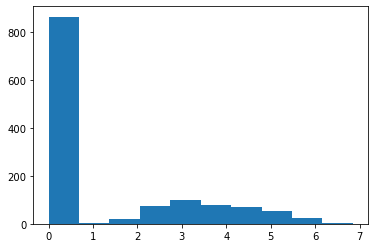

In [72]:
plt.hist(dg_insitu.loc['eve'])

(array([1542.,  340.,  208.,  153.,  156.,  144.,  135.,  142.,  148.,
          71.]),
 array([0.001964 , 0.1054487, 0.2089334, 0.3124181, 0.4159028, 0.5193875,
        0.6228722, 0.7263569, 0.8298416, 0.9333263, 1.036811 ]),
 <BarContainer object of 10 artists>)

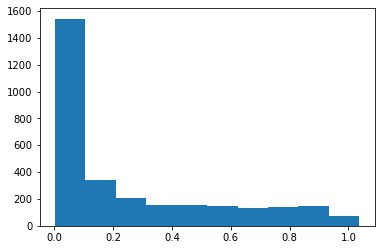

In [76]:
plt.hist(bdt['eve'])

(array([863.,   4.,  19.,  75., 100.,  80.,  72.,  55.,  25.,   4.]),
 array([0.     , 0.68482, 1.36964, 2.05446, 2.73928, 3.4241 , 4.10892,
        4.79374, 5.47856, 6.16338, 6.8482 ]),
 <BarContainer object of 10 artists>)

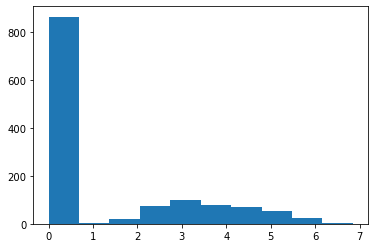

In [77]:
plt.hist(dg_insitu.loc['eve'])

In [31]:
dg.loc[['zye','18w']]

,GTACTAATTACN_2,AGGCTAATGGAC_3,TAGACAAAAGCT_4,TCTACTAGTGTN_5,CCGTGCTGAACA_3,GAGAAAATGAAG_7,GCCTAGTGACGT_4,CAGTATCGAGAN_2,AGATTACCCTTC_6,AACCCCACGCTC_2,...,TAGAGGACCGTA_3,TTGGGTAACAGC_3,GTGAGCTTATGG_3,GCTTCTCCGTCT_3,GCTTGGAAATCC_7,GCGATCAGTCTT_3,AGAACGATATAC_8,CCGATTCGCTTN_4,CCTCTCAGTCTC_5,GACTCTCTCGCA_4
zye,0.000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0000
18w,3.443,3.0066,2.3175,4.06,3.5326,2.3936,3.2082,2.5561,0.0,0.0,...,3.4705,0.0,0.0,0.0,3.7287,0.0,0.0,0.0,5.6108,3.4226


In [32]:
dg_insitu

,GTACTAATTACN_2,AGGCTAATGGAC_3,TAGACAAAAGCT_4,TCTACTAGTGTN_5,CCGTGCTGAACA_3,GAGAAAATGAAG_7,GCCTAGTGACGT_4,CAGTATCGAGAN_2,AGATTACCCTTC_6,AACCCCACGCTC_2,...,TAGAGGACCGTA_3,TTGGGTAACAGC_3,GTGAGCTTATGG_3,GCTTCTCCGTCT_3,GCTTGGAAATCC_7,GCGATCAGTCTT_3,AGAACGATATAC_8,CCGATTCGCTTN_4,CCTCTCAGTCTC_5,GACTCTCTCGCA_4
aay,3.8658,4.1226,0.0000,2.2986,4.6819,4.1714,0.0000,3.4279,0.0000,2.3432,...,5.3694,0.0000,5.4294,4.3439,4.6733,4.1949,0.0000,1.9716,0.0000,3.4226
Ama,4.9367,1.7423,7.7824,4.8298,6.6391,6.5638,7.2618,6.8235,8.0663,6.3661,...,0.0000,3.5544,7.9250,5.5649,5.2392,3.2716,6.4550,6.7697,3.1664,7.7145
Ance,1.1599,1.7423,0.0000,0.0000,0.0000,0.0000,3.7401,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Antp,1.7945,1.7423,4.3871,0.0000,4.8675,5.1308,3.2082,5.1361,4.3030,2.3432,...,4.9659,6.0332,6.8674,4.8089,4.2769,4.1949,0.0000,1.9716,3.1664,3.4226
apt,4.9937,5.4336,4.6385,5.3290,3.5326,4.9440,3.2082,3.4279,0.0000,4.8836,...,3.4705,0.0000,0.0000,4.5950,5.9608,0.0000,4.9025,0.0000,4.6401,2.5513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tsh,1.1599,1.7423,5.4864,0.0000,3.0086,4.9440,4.6851,5.7732,4.8634,0.0000,...,5.3694,5.0550,5.7446,4.5950,0.0000,0.0000,0.0000,3.6654,0.0000,4.6615
twi,2.2337,0.0000,6.1031,0.0000,5.7511,4.4772,5.7701,3.4279,2.5071,4.8836,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.4550,6.0918,0.0000,4.9150
zen,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.6102,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
zen2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.3030,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [33]:
# Goal is to position nuclei based on expression of genes with imaging data
# First question is can we reposition these nuclei based on their expression?

In [34]:
bdt

,aay,Ama,Ance,Antp,apt,Blimp-1,bmm,bowl,brk,Btk29A,...,Traf4,trn,tsh,twi,zen,zen2,zfh1,x_pos,y_pos,z_pos
0,0.116516,0.224190,0.033730,0.104307,0.673878,0.856570,0.469676,0.286151,0.320923,0.737946,...,0.129360,0.087361,0.147089,0.225082,0.027564,0.297847,0.372422,-194.042242,0.221890,30.195476
1,0.113320,0.208761,0.044785,0.103447,0.743820,0.462554,0.570401,0.345240,0.320727,0.913163,...,0.313327,0.230506,0.190749,0.440296,0.024157,0.455723,0.389489,-203.322900,1.928557,20.081308
2,0.092872,0.172598,0.036166,0.096985,0.838291,0.467538,0.478229,0.377768,0.297598,0.931254,...,0.161869,0.102645,0.177968,0.347098,0.019817,0.598716,0.502384,-200.250107,3.588368,23.932470
3,0.101251,0.207963,0.066009,0.092872,0.597823,0.497481,0.479122,0.580058,0.334111,0.746340,...,0.287976,0.382287,0.189138,0.542763,0.019013,0.570066,0.397117,-205.875337,3.577224,14.820966
4,0.127009,0.176440,0.084271,0.027938,0.621983,0.833522,0.680243,0.201147,0.359235,0.755608,...,0.105062,0.109857,0.166762,0.259750,0.025874,0.349462,0.498263,-193.173936,9.531855,29.667388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,0.108630,0.123423,0.072152,0.460941,0.274066,0.591140,0.215415,0.226733,0.139501,0.657080,...,0.119654,0.121339,0.911462,0.103898,0.142042,0.426652,0.537250,-16.754806,63.306474,27.299752
3035,1.489714,0.144034,0.049330,0.081190,0.821476,0.312973,0.108817,0.236404,0.679630,0.482218,...,0.432099,0.123119,0.111749,0.089729,0.043411,0.606762,0.629268,166.074792,5.717830,44.866596
3036,0.095975,0.648871,0.014741,0.184826,0.357911,0.406147,0.400752,0.308844,0.437903,0.133464,...,0.270265,0.359610,0.156088,0.444891,0.017977,0.125641,0.380294,-118.396337,33.403262,-48.864773
3037,0.220409,0.751017,0.048882,0.331598,0.189880,0.278077,0.177882,0.182164,0.107902,0.188577,...,0.503958,0.187839,0.852346,0.937886,0.039697,0.340491,0.286497,-20.054276,3.220607,-78.112121


In [83]:
X_bdt = bdt[insitu_dg_genes].values

In [84]:
X_bdt.shape

(3039, 84)

In [85]:
y_bdt = bdt[['x_pos','y_pos','z_pos']].values

In [78]:
X_dg = dg_insitu.values.T

In [79]:
X_dg.shape

(1297, 84)

In [80]:
X_dg

array([[3.8658, 4.9367, 1.1599, ..., 0.    , 0.    , 4.3751],
       [4.1226, 1.7423, 1.7423, ..., 0.    , 0.    , 0.    ],
       [0.    , 7.7824, 0.    , ..., 0.    , 0.    , 5.4864],
       ...,
       [1.9716, 6.7697, 0.    , ..., 0.    , 0.    , 3.9644],
       [0.    , 3.1664, 0.    , ..., 0.    , 0.    , 0.    ],
       [3.4226, 7.7145, 0.    , ..., 0.    , 0.    , 4.6615]])

(array([1.710e+02, 1.270e+03, 1.251e+03, 2.670e+02, 5.200e+01, 1.300e+01,
        9.000e+00, 5.000e+00, 0.000e+00, 1.000e+00]),
 array([0.588366 , 0.7727908, 0.9572156, 1.1416404, 1.3260652, 1.51049  ,
        1.6949148, 1.8793396, 2.0637644, 2.2481892, 2.432614 ]),
 <BarContainer object of 10 artists>)

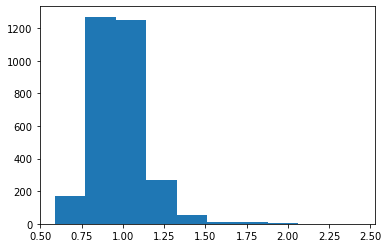

In [91]:
plt.hist(X_bdt.max(axis=1))

In [105]:
scaler = StandardScaler()

X_bdt_norm =  scaler.fit_transform(X_bdt)
X_dg_norm =  scaler.fit_transform(X_dg)

In [106]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [107]:
clf = DecisionTreeRegressor()

In [108]:
clf.fit(X_bdt_norm,y_bdt)

DecisionTreeRegressor()

In [111]:
y_bdt_pred = clf.predict(X_bdt_norm)

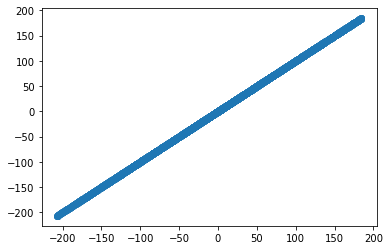

In [112]:
i = 0
plt.scatter(y_bdt[:,i],y_bdt_pred[:,i])

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_bdt_norm,y_bdt, test_size = 0.5, random_state = 12389123)

In [115]:
clf.fit(X_train,y_train)

DecisionTreeRegressor()

In [116]:
y_test_pred = clf.predict(X_test)

In [117]:
y_test_pred.shape

(1520, 3)

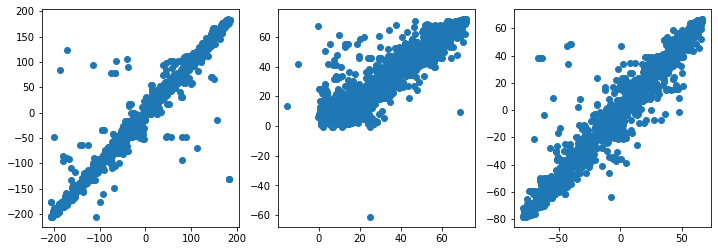

In [118]:
fig, ax = plt.subplots(1,3,figsize=(12,4))

for i in range(0,3):
    ax[i].scatter(y_test[:,i],y_test_pred[:,i])

In [119]:
y_dg = clf.predict(X_dg_norm)

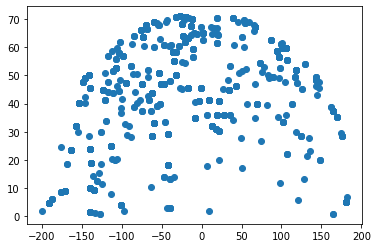

In [121]:
plt.scatter(y_dg[:,0],y_dg[:,1])

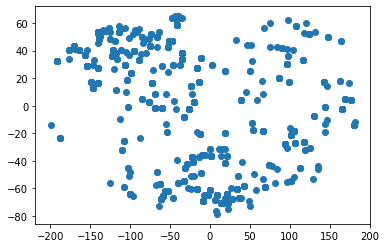

In [122]:
plt.scatter(y_dg[:,0],y_dg[:,2])

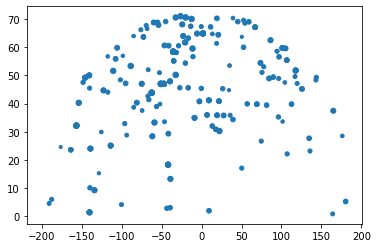

In [139]:
g = 'eve'

plt.scatter(y_dg[:,0],y_dg[:,1],s=5*dg_insitu.loc[g])

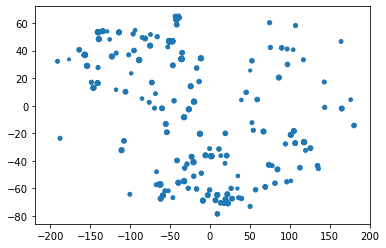

In [140]:
plt.scatter(y_dg[:,0],y_dg[:,2],s=5*dg_insitu.loc[g])

In [141]:
clf = RandomForestRegressor()

In [142]:
clf.fit(X_train,y_train)

RandomForestRegressor()

In [143]:
y_test_pred = clf.predict(X_test)

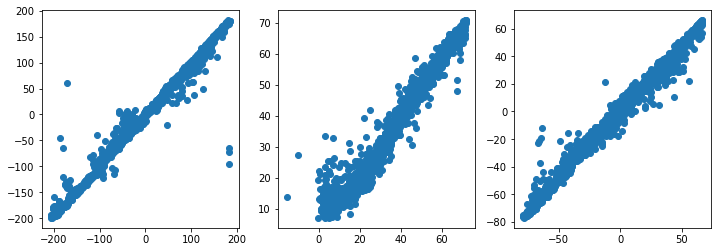

In [144]:
fig, ax = plt.subplots(1,3,figsize=(12,4))

for i in range(0,3):
    ax[i].scatter(y_test[:,i],y_test_pred[:,i])

In [145]:
y_dg = clf.predict(X_dg_norm)

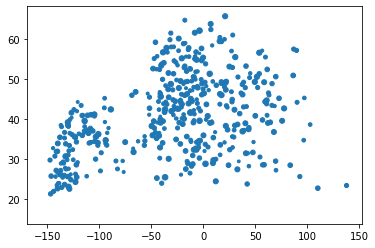

In [146]:
g = 'eve'

plt.scatter(y_dg[:,0],y_dg[:,1],s=5*dg_insitu.loc[g])

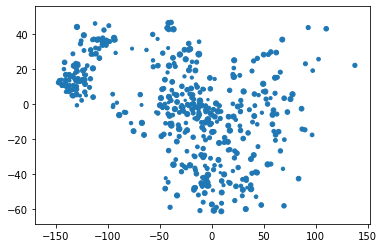

In [149]:
g = 'eve'

plt.scatter(y_dg[:,0],y_dg[:,2],s=5*dg_insitu.loc[g])

In [156]:
X1 = X_bdt_norm

In [157]:
X2 = X_dg_norm

In [158]:
X1.shape

(3039, 84)

In [159]:
from sklearn.neural_network import MLPRegressor

In [163]:
clf = MLPRegressor(max_iter = 1000)

In [164]:
clf.fit(X_train,y_train)

/Users/eisen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=1000)

In [167]:
y_test_pred = clf.predict(X_test)

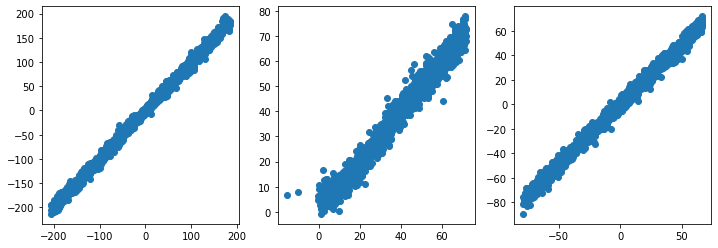

In [168]:
fig, ax = plt.subplots(1,3,figsize=(12,4))

for i in range(0,3):
    ax[i].scatter(y_test[:,i],y_test_pred[:,i])

In [169]:
y_dg = clf.predict(X_dg_norm)

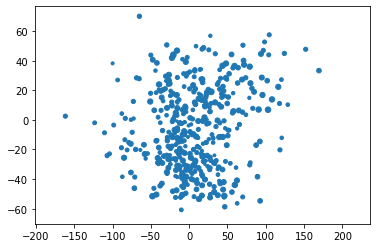

In [170]:
g = 'eve'

plt.scatter(y_dg[:,0],y_dg[:,2],s=5*dg_insitu.loc[g])

In [171]:
X_bdt_norm.shape

(3039, 84)

In [172]:
y_bdt = np.arange(3039)

clf = DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(X_bdt_norm,y_bdt, test_size = 0.33, random_state = 12389123)

In [ ]:
clf = MLPRegressor(max_iter = 1000)

In [176]:
from sklearn.naive_bayes import *
from sklearn.neural_network import *

In [177]:
clf = MLPClassifier()

In [178]:
clf.fit(X_bdt_norm,y_bdt)

/Users/eisen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [181]:
y_dg = clf.predict_proba(X_dg_norm)

In [182]:
y_dg.shape

(1297, 3039)

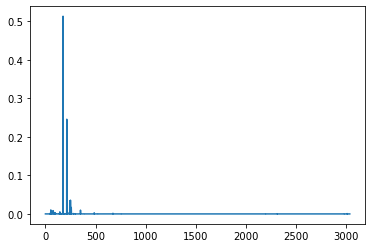

In [194]:
plt.plot(y_dg[0])

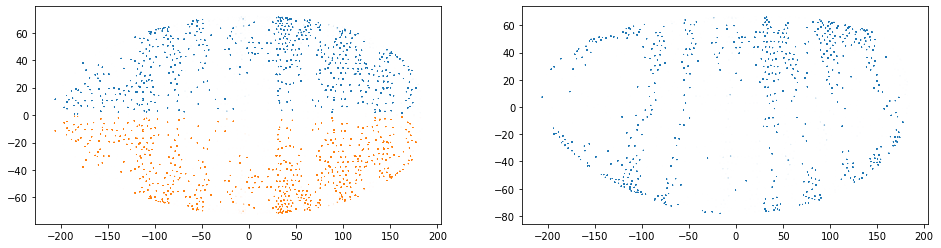

In [208]:
c = 200

fig,ax = plt.subplots(1,2,figsize=(16,4))
ax[0].scatter(bdt.x_pos,bdt.y_pos,s=y_dg[c])
ax[0].scatter(bdt.x_pos,-bdt.y_pos,s=y_dg[c])
ax[1].scatter(bdt.x_pos,bdt.z_pos,s=y_dg[c])


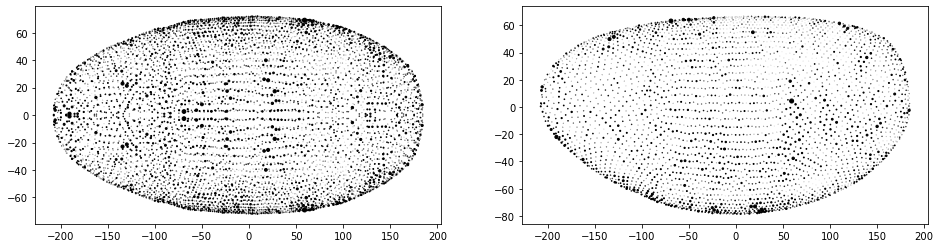

In [255]:
c = 200

fig,ax = plt.subplots(1,2,figsize=(16,4))
ax[0].scatter(bdt.x_pos,bdt.y_pos,s=np.sum(y_dg,axis=0),c='black')
ax[0].scatter(bdt.x_pos,-bdt.y_pos,s=np.sum(y_dg,axis=0),c='black')
ax[1].scatter(bdt.x_pos,bdt.z_pos,s=np.sum(y_dg,axis=0),c='black')


In [211]:
y_dg.shape

(1297, 3039)

In [214]:
X_dg.shape

(1297, 84)

In [216]:
X.shape

(1297, 8924)

In [218]:
m = np.matrix(X.T) * np.matrix(y_dg)

In [222]:
m.shape

(8924, 3039)

In [225]:
mdf = pd.DataFrame(data=m.T)
mdf.columns = list(dg.index)

In [230]:
mdf

,128up,140up,14-3-3epsilon,14-3-3zeta,18w,26-29-p,2mit,4EHP,4E-T,5-HT1A,...,ZnT77C,ZnT86D,zpg,Zpr1,zuc,Zw10,Zwilch,zyd,zye,Zyx
0,2.266069,1.694436,18.007504,12.650615,5.089373,0.007070,0.000034,4.321837,1.099936,0.025016,...,0.110162,1.877110,3.256340,4.861365,3.783674,4.776308,0.071737,2.277110,1.919412e-03,7.927999
1,0.052669,0.024991,0.480303,0.321192,0.101733,0.000117,0.000049,0.198274,0.118750,0.001253,...,0.003240,0.011219,0.021898,0.100255,0.139959,0.051388,0.038685,0.002229,5.372845e-06,0.236061
2,0.760736,0.739667,3.804541,2.252830,1.546027,0.000727,0.000085,1.523421,0.030850,0.006661,...,0.009633,0.013706,0.023119,0.746715,0.263302,0.254154,0.583962,0.005030,7.022934e-05,1.914517
3,5.949405,3.922715,42.256152,27.900576,7.874244,0.010729,0.000028,16.265610,8.839347,2.517980,...,3.675491,3.742222,4.488829,6.229447,10.656150,7.464675,2.674365,3.624393,6.476178e-05,11.324476
4,0.381185,0.045255,4.222392,2.614874,0.716218,0.001539,0.000011,1.117679,0.804245,0.001008,...,0.280545,0.539590,0.126935,0.970692,0.897508,0.586858,0.457233,0.141239,3.213549e-04,1.598686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,0.248540,0.100415,1.198943,0.787634,0.261486,0.095526,0.000207,0.632175,0.138272,0.008303,...,0.016889,0.105524,0.058678,0.324044,0.387598,0.377422,0.115395,0.032033,2.137422e-04,0.458859
3035,0.116058,0.137941,0.514620,0.340065,0.156601,0.001927,0.000069,0.191745,0.088102,0.002870,...,0.009360,0.076885,0.045606,0.125250,0.160204,0.118443,0.042275,0.057255,3.480418e-04,0.261763
3036,0.263578,0.032352,1.218214,0.764744,0.110830,0.001982,0.011534,0.362465,0.278789,0.000476,...,0.123468,0.057093,0.269212,0.198595,0.488133,0.242531,0.035894,0.158490,2.516247e-04,0.536290
3037,0.084888,0.205813,1.173819,0.730694,0.211113,0.016255,0.000313,0.426025,0.072059,0.009408,...,0.018856,0.132635,0.119910,0.195602,0.418190,0.167350,0.089020,0.096025,1.375591e-04,0.449657


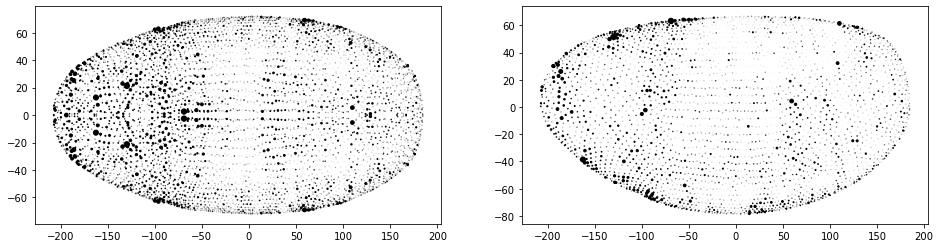

In [249]:
g = 'gt'

fig,ax = plt.subplots(1,2,figsize=(16,4))

ax[0].scatter(gdf.x_pos,gdf.y_pos,s=mdf[g],c='black')
ax[0].scatter(gdf.x_pos,-gdf.y_pos,s=mdf[g],c='black')
ax[1].scatter(gdf.x_pos,gdf.z_pos,s=mdf[g],c='black')


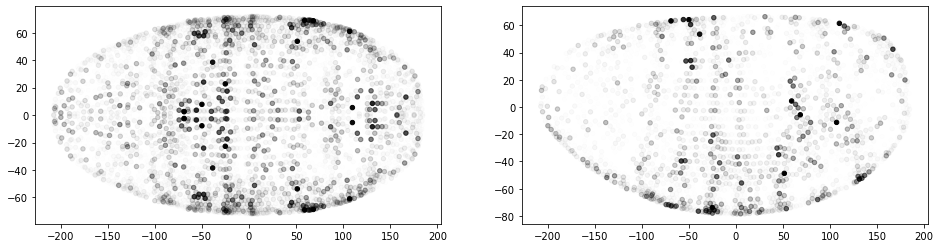

In [256]:
g = 'eve'

fig,ax = plt.subplots(1,2,figsize=(16,4))

mv = np.max(mdf[g])
al = np.clip(3*mdf[g]/mv,0,1)
s = 20

ax[0].scatter(gdf.x_pos,gdf.y_pos,s=s,c='black',alpha=al)
ax[0].scatter(gdf.x_pos,-gdf.y_pos,s=s,c='black',alpha=al)
ax[1].scatter(gdf.x_pos,gdf.z_pos,s=s,c='black',alpha=al)

In [266]:
y_dg.shape

(1297, 3039)

(array([2.362e+03, 3.220e+02, 1.480e+02, 7.800e+01, 5.300e+01, 2.100e+01,
        1.200e+01, 1.100e+01, 6.000e+00, 5.000e+00, 5.000e+00, 2.000e+00,
        4.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5]),
 <BarContainer object of 29 artists>)

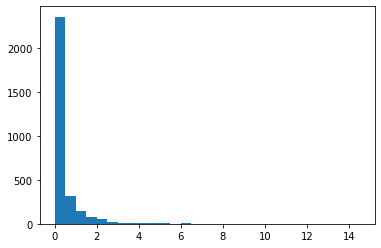

In [270]:
plt.hist(y_dg.sum(axis=0),bins=np.arange(0,15,.5))

In [276]:
mdf

,NaN,0,1,2,3,4,5,6,7,8,...,zen2,zetaCOP,zf30C,zfh1,zfh2,zip,zpg,zuc,zyd,zye
0,4.386299e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.390611e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.353040e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.742755e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.558290e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,8.960202e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3035,7.371314e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3036,8.586200e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3037,5.392001e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [277]:
mdfn = mdf.copy()

s = mdf.sum(axis=1)

for c in mdfn.columns:
    mdfn[c] = mdf[c] / s

In [281]:
mdfn

,128up,140up,14-3-3epsilon,14-3-3zeta,18w,26-29-p,2mit,4EHP,4E-T,5-HT1A,...,ZnT77C,ZnT86D,zpg,Zpr1,zuc,Zw10,Zwilch,zyd,zye,Zyx
0,0.000079,0.000059,0.000624,0.000439,0.000176,2.451576e-07,1.187598e-09,0.000150,0.000038,8.674692e-07,...,0.000004,0.000065,0.000113,0.000169,0.000131,0.000166,0.000002,7.896378e-05,6.655982e-08,0.000275
1,0.000071,0.000034,0.000645,0.000432,0.000137,1.577293e-07,6.525865e-08,0.000266,0.000160,1.682905e-06,...,0.000004,0.000015,0.000029,0.000135,0.000188,0.000069,0.000052,2.995067e-06,7.219085e-09,0.000317
2,0.000140,0.000136,0.000700,0.000414,0.000284,1.337524e-07,1.565361e-08,0.000280,0.000006,1.224669e-06,...,0.000002,0.000003,0.000004,0.000137,0.000048,0.000047,0.000107,9.247961e-07,1.291246e-08,0.000352
3,0.000089,0.000059,0.000632,0.000417,0.000118,1.604828e-07,4.246284e-10,0.000243,0.000132,3.766398e-05,...,0.000055,0.000056,0.000067,0.000093,0.000159,0.000112,0.000040,5.421371e-05,9.687075e-10,0.000169
4,0.000062,0.000007,0.000684,0.000424,0.000116,2.494775e-07,1.744280e-09,0.000181,0.000130,1.632933e-07,...,0.000045,0.000087,0.000021,0.000157,0.000145,0.000095,0.000074,2.289040e-05,5.208171e-08,0.000259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,0.000136,0.000055,0.000658,0.000432,0.000144,5.242810e-05,1.133573e-07,0.000347,0.000076,4.557039e-06,...,0.000009,0.000058,0.000032,0.000178,0.000213,0.000207,0.000063,1.758109e-05,1.173097e-07,0.000252
3035,0.000140,0.000166,0.000621,0.000410,0.000189,2.323691e-06,8.317966e-08,0.000231,0.000106,3.462036e-06,...,0.000011,0.000093,0.000055,0.000151,0.000193,0.000143,0.000051,6.905780e-05,4.197900e-07,0.000316
3036,0.000143,0.000018,0.000663,0.000416,0.000060,1.078866e-06,6.277795e-06,0.000197,0.000152,2.589181e-07,...,0.000067,0.000031,0.000147,0.000108,0.000266,0.000132,0.000020,8.626421e-05,1.369560e-07,0.000292
3037,0.000047,0.000115,0.000656,0.000409,0.000118,9.088976e-06,1.748035e-07,0.000238,0.000040,5.260317e-06,...,0.000011,0.000074,0.000067,0.000109,0.000234,0.000094,0.000050,5.369076e-05,7.691398e-08,0.000251


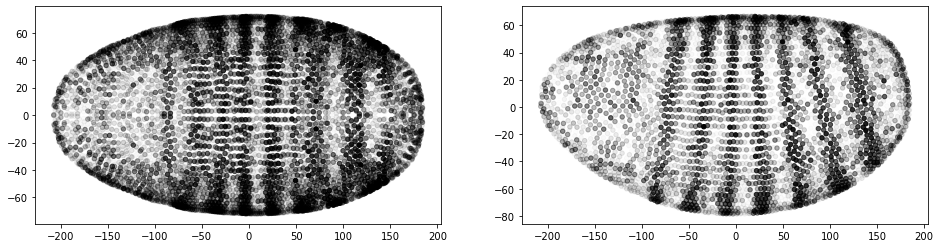

In [285]:
g = 'ftz'

fig,ax = plt.subplots(1,2,figsize=(16,4))

mv = np.max(mdfn[g])
al = np.clip(mdfn[g]/mv,0,1)
s = 20

ax[0].scatter(gdf.x_pos,gdf.y_pos,s=s,c='black',alpha=al)
ax[0].scatter(gdf.x_pos,-gdf.y_pos,s=s,c='black',alpha=al)
ax[1].scatter(gdf.x_pos,gdf.z_pos,s=s,c='black',alpha=al)

In [287]:
insitu_dg_genes

['aay',
 'Ama',
 'Ance',
 'Antp',
 'apt',
 'Blimp-1',
 'bmm',
 'bowl',
 'brk',
 'Btk29A',
 'bun',
 'cad',
 'CenG1A',
 'CG10479',
 'CG11208',
 'CG14427',
 'CG17724',
 'CG17786',
 'CG43394',
 'CG8147',
 'cnc',
 'croc',
 'Cyp310a1',
 'D',
 'dan',
 'danr',
 'Dfd',
 'disco',
 'Doc2',
 'Doc3',
 'dpn',
 'edl',
 'ems',
 'erm',
 'Esp',
 'E(spl)m5-HLH',
 'eve',
 'exex',
 'fj',
 'fkh',
 'ftz',
 'gk',
 'gt',
 'h',
 'hb',
 'hkb',
 'htl',
 'Ilp4',
 'ImpE2',
 'ImpL2',
 'ken',
 'kni',
 'knrl',
 'Kr',
 'lok',
 'Mdr49',
 'Mes2',
 'MESR3',
 'mfas',
 'Nek2',
 'NetA',
 'noc',
 'nub',
 'numb',
 'oc',
 'odd',
 'peb',
 'prd',
 'pxb',
 'rau',
 'rho',
 'run',
 'sna',
 'srp',
 'tkv',
 'tll',
 'toc',
 'Traf4',
 'trn',
 'tsh',
 'twi',
 'zen',
 'zen2',
 'zfh1']

In [292]:
insitu_dg_genes_noeve = insitu_dg_genes.copy()

In [293]:
insitu_dg_genes_noeve.remove('eve')

In [295]:
X_bdt_ne = bdt[insitu_dg_genes_noeve].values

In [298]:
X_dg_ne = dg.loc[insitu_dg_genes_noeve].values.T

In [299]:
scaler = StandardScaler()

X_bdt_ne_norm =  scaler.fit_transform(X_bdt_ne)
X_dg_ne_norm =  scaler.fit_transform(X_dg_ne)

In [300]:
clf.fit(X_bdt_ne_norm,y_bdt)

/Users/eisen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [302]:
y_dg_ne = clf.predict_proba(X_dg_ne_norm)

In [303]:
m_ne = np.matrix(X.T) * np.matrix(y_dg_ne)

In [304]:
mdf_ne = pd.DataFrame(data=m_ne.T)
mdf_ne.columns = list(dg.index)

In [305]:
mdfn_ne = mdf_ne.copy()

s = mdf_ne.sum(axis=1)

for c in mdfn_ne.columns:
    mdfn_ne[c] = mdf_ne[c] / s

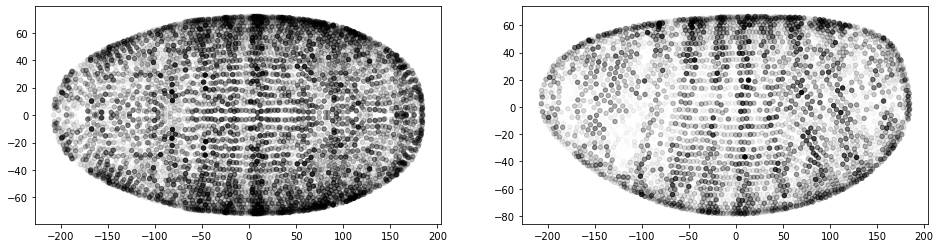

In [307]:
g = 'eve'

fig,ax = plt.subplots(1,2,figsize=(16,4))

mv = np.max(mdfn_ne[g])
al = np.clip(mdfn_ne[g]/mv,0,1)
s = 20

ax[0].scatter(gdf.x_pos,gdf.y_pos,s=s,c='black',alpha=al)
ax[0].scatter(gdf.x_pos,-gdf.y_pos,s=s,c='black',alpha=al)
ax[1].scatter(gdf.x_pos,gdf.z_pos,s=s,c='black',alpha=al)

In [311]:
mdfn['x_pos'] = gdf['x_pos']
mdfn['anterior'] = mdfn['x_pos'] <= 0

In [339]:
ap = mdfn.groupby('anterior').mean().T.reset_index()
ap.columns = ['gene','Pos','Ant']

In [340]:
ap

,gene,Pos,Ant
0,128up,0.000089,0.000092
1,140up,0.000079,0.000083
2,14-3-3epsilon,0.000671,0.000649
3,14-3-3zeta,0.000432,0.000419
4,18w,0.000139,0.000150
...,...,...,...
8920,Zwilch,0.000045,0.000051
8921,zyd,0.000049,0.000051
8922,zye,0.000003,0.000003
8923,Zyx,0.000271,0.000274


In [341]:
ap['bias'] = (ap['Ant'] - ap['Pos'])/(ap['Ant'] + ap['Pos'])

In [344]:
ap[(ap.Ant > .0001) & (~ap.gene.isin(insitu_dg_genes))].sort_values('bias')

,gene,Pos,Ant,bias
496,bxd,0.000278,0.000163,-0.258644
8728,veil,0.000177,0.000121,-0.187756
286,Atg1,0.000142,0.000109,-0.133770
8663,Ubx,0.000174,0.000133,-0.132680
3043,CG42762,0.000392,0.000320,-0.102310
...,...,...,...,...
5996,Hsp83,0.000154,0.000207,0.146171
4894,CR45559,0.000076,0.000104,0.156825
8683,uif,0.000084,0.000117,0.161714
3071,CG43085,0.000145,0.000202,0.163700


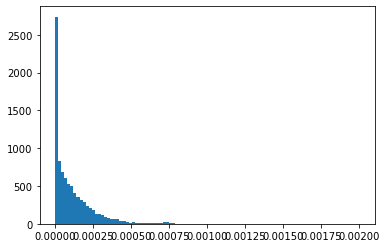

In [330]:
h = plt.hist(ap.Ant,bins=np.linspace(0,.002,100))

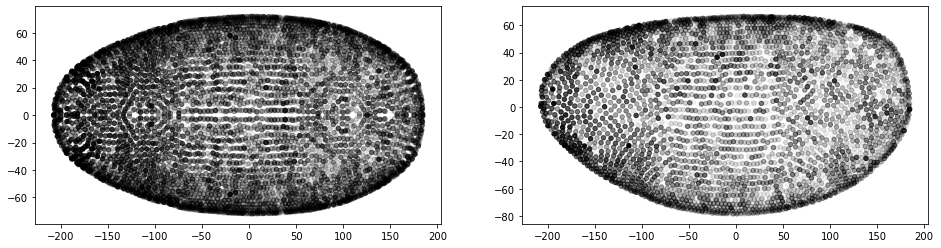

In [355]:
g = 'Hsp83'

fig,ax = plt.subplots(1,2,figsize=(16,4))

mv = np.max(mdfn_ne[g])
al = np.clip(mdfn_ne[g]/mv,0,1)
s = 20

ax[0].scatter(gdf.x_pos,gdf.y_pos,s=s,c='black',alpha=al)
ax[0].scatter(gdf.x_pos,-gdf.y_pos,s=s,c='black',alpha=al)
ax[1].scatter(gdf.x_pos,gdf.z_pos,s=s,c='black',alpha=al)